In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import scipy.stats as sts

#####  1. Загрузить файл hr.csv

In [2]:
df = pd.read_csv('hr.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.profile_report()

###### 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [6]:
df.mode().T

,0,1
satisfaction_level,0.1,NaN
last_evaluation,0.55,NaN
number_project,4,NaN
average_montly_hours,135,156
time_spend_company,3,NaN
Work_accident,0,NaN
left,0,NaN
promotion_last_5years,0,NaN
sales,sales,NaN
salary,low,NaN


##### 3. Рассчитать и визуализировать корреляционную матрицу для переменных

In [7]:
corr_matrix = df.corr().round(2)
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.06,-0.39,0.03
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01,0.01,-0.01
number_project,-0.14,0.35,1.00,0.42,0.20,-0.00,0.02,-0.01
average_montly_hours,-0.02,0.34,0.42,1.00,0.13,-0.01,0.07,-0.00
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.00,0.14,0.07
Work_accident,0.06,-0.01,-0.00,-0.01,0.00,1.00,-0.15,0.04
left,-0.39,0.01,0.02,0.07,0.14,-0.15,1.00,-0.06
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,0.04,-0.06,1.00


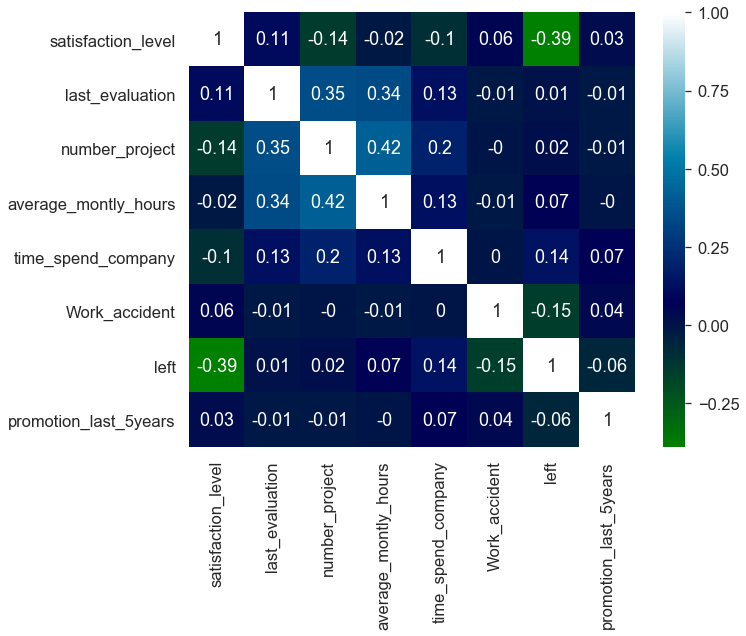

In [8]:
sns.set(rc=({'figure.figsize':(10, 8)}), font_scale=1.5)
sns.heatmap(corr_matrix, annot=True, xticklabels=corr_matrix.columns.values, yticklabels=corr_matrix.columns.values, cmap="ocean")

Видна обратная корреляция между уходом сотрудника из компании и уровнем его удволетворенности

##### 4.Визуализировать несколько взаимосвязей между переменными

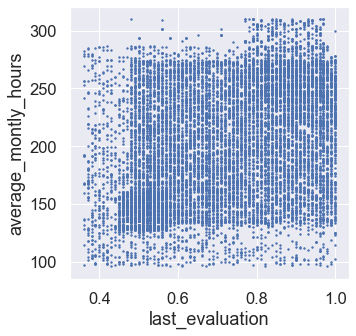

In [9]:
x = df[['last_evaluation', 'number_project', 'average_montly_hours']]
sizeXY = (5,5)
sizeP =2

plt.figure(figsize=sizeXY)
plt.xlabel(x.columns[0])
plt.ylabel(x.columns[2])
plt.scatter(x.iloc[:,0], x.iloc[:,2], s = sizeP)
plt.show()

У сотрудников с оценкой выше 0,5 резко возрастает время работы

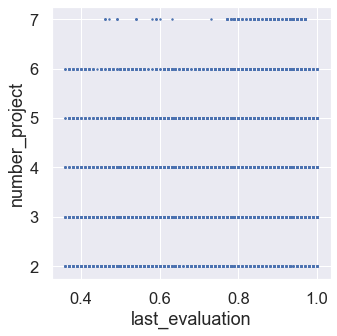

In [10]:
plt.figure(figsize=sizeXY)
plt.xlabel(x.columns[0])
plt.ylabel(x.columns[1])
plt.scatter(x.iloc[:,0], x.iloc[:,1], s = sizeP)
plt.show()

7 проектов имеют сотрудники с оценкой от ~0.8, обратил бы на это внимание при распределения новых проетов

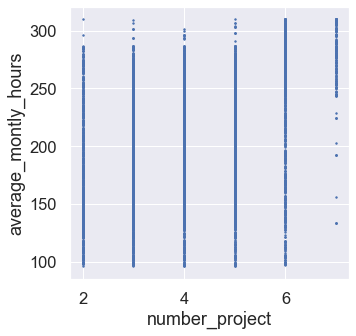

In [11]:
plt.figure(figsize=sizeXY)
plt.xlabel(x.columns[1])
plt.ylabel(x.columns[2])
plt.scatter(x.iloc[:,1], x.iloc[:,2], s = sizeP)
plt.show()

Загруженность сотрудников с 7 проектами, много выше ~250 часов

##### 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

H0: Отсутствует отличия оценок у уволевшихся сотрудников и остальных

In [12]:
print(sts.ttest_ind(df["last_evaluation"], df[df["left"] == 1]["last_evaluation"]))

Ttest_indResult(statistic=-0.6116021924432762, pvalue=0.540808475065452)


P = 0.54 гипотеза не отвергается

H0: среднее количество отработанных часов не отличается в группах уволившихся и работающих сотрудников.

In [13]:
print(sts.ttest_ind(df[df["left"] == 0]["average_montly_hours"], df[df["left"] == 1]["average_montly_hours"]))

Ttest_indResult(statistic=-8.752254731850009, pvalue=2.3113035567540143e-18)


Гипотеза отвергается

H0: Уровень удовлетворенности у сотрудников с высокой и низкой зарплатой не отличаются

In [14]:
print(sts.ttest_ind(df[df['salary']=='low']['satisfaction_level'], df[df['salary']=='high']['satisfaction_level']))

Ttest_indResult(statistic=-4.76273109535092, pvalue=1.9413281282548522e-06)


Гипотеза отвергается

##### 6.Рассчитать сколько работников работает в каждом департаменте

In [15]:
workers = df.groupby('sales').count()\
    .reset_index()\
    .rename(columns={"sales": "department", "satisfaction_level": "workers"})\
    .iloc[:,0:2]
workers

,department,workers
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720


##### 7.Показать распределение сотрудников по зарплатам

In [16]:
df.salary.value_counts(normalize=True)*100

low       48.776585
medium    42.976198
high       8.247216
Name: salary, dtype: float64

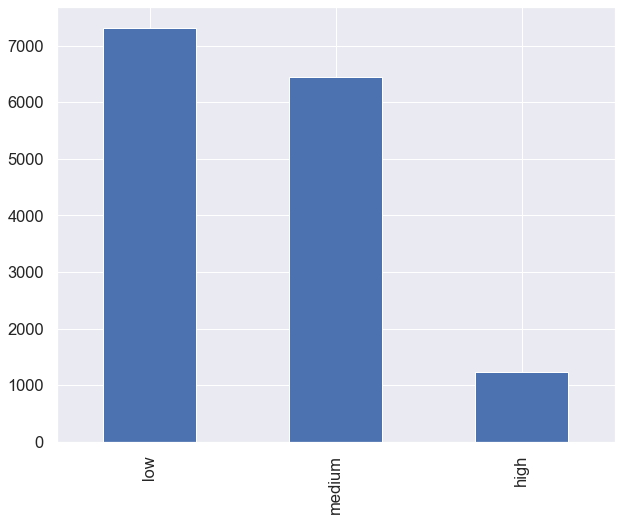

In [17]:
df.salary.value_counts().plot(kind='bar')

##### 8.Показать распределение сотрудников по зарплатам совместно с департаментами

In [18]:
salary_by_dep = df.groupby(['sales', 'salary']).count()[['left']].rename(columns={"left":"count_by_salary"}).reindex(level=1, index = ['high', 'medium', 'low'])
salary_by_dep

count_by_salary
sales       salary                 
IT          high                 83
            medium              535
            low                 609
RandD       high                 51
            medium              372
            low                 364
accounting  high                 74
            medium              335
            low                 358
hr          high                 45
            medium              359
            low                 335
management  high                225
            medium              225
            low                 180
marketing   high                 80
            medium              376
            low                 402
product_mng high                 68
            medium              383
            low                 451
sales       high                269
            medium             1772
            low                2099
support     high                141
            medium              942
            low                1146
technical   high                201
            medium             1147
            low                1372

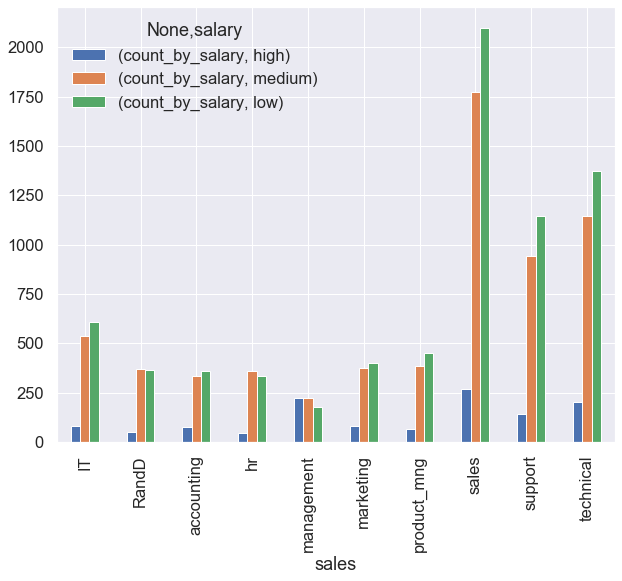

In [19]:
salary_by_dep.unstack('salary').plot(kind='bar')

##### 9.Сколько сотрудников покинули компанию.

In [20]:
left_ = df[df['left'] == 1]['left'].count()
total_ = df['left'].count()
percent_left = df[df['left'] == 1]['left'].count()/df['left'].count()*100
percent_left = percent_left.round(2)


print(f'Всего сотрудников в компанию: {total_} человек')
print(f'Cотрудников, покинувших компанию: {left_} человек, {percent_left} %')

Всего сотрудников в компанию: 14999 человек
Cотрудников, покинувших компанию: 3571 человек, 23.81 %


##### 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

H0: Нет различий уровня удовлетворенности уволившихся сотрудников и всей выборки

In [21]:
ttest_satisfaction = sts.ttest_1samp(df[df['left']==1]['satisfaction_level'], df['satisfaction_level'].mean())
print(ttest_satisfaction)

Ttest_1sampResult(statistic=-39.10948894348446, pvalue=9.012781195378076e-279)


In [22]:
print(f"P = {ttest_satisfaction.pvalue:0.5f}, гипотеза отклонена")

P = 0.00000, гипотеза отклонена


H0: Уволившихся сотрудников реже повышали в должности

In [23]:
ttest_promotion_last_5years = sts.ttest_ind(df[df['left']==0]['promotion_last_5years'], df[df['left']==1]['promotion_last_5years'])
print(ttest_promotion_last_5years)

Ttest_indResult(statistic=7.581195349367637, pvalue=3.624047224146943e-14)


In [24]:
print(f"T-value = {ttest_promotion_last_5years.statistic:0.5f}, P = {ttest_promotion_last_5years.pvalue:0.5f}, гипотеза принимается")

T-value = 7.58120, P = 0.00000, гипотеза принимается


Распределение Манна-Уитни

In [25]:
utest = sts.mannwhitneyu(df[df["left"] == 0]["promotion_last_5years"], df[df["left"] == 1]["promotion_last_5years"])
print(utest)

MannwhitneyuResult(statistic=19977610.0, pvalue=1.9103960097818644e-14)


In [26]:
print(f"P = {utest.pvalue:0.5f}, гипотеза принята")

P = 0.00000, гипотеза принята
